In [131]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import funciones as fun

from datetime import datetime, date, time
import numpy as np
import datetime as dt
import seaborn as sns

In [132]:
path_datos_limpios = os.path.join('Datos','Limpios')
path_datos = os.path.join('Datos','Originales')
# Cargamos los datasets
df = pd.read_csv(os.path.join(path_datos_limpios, 'para_outliers.csv'))

In [133]:
df.head()

,Codigo_NIF,Nombre_sabi,Localidad,Fecha constitucion,Codigo consolidacion,Codigo primario CNAE 2009,Forma juridica,Forma juridica detallada,Estado,Estado detallado,...,Ratios de autonomía financiera a medio y largo plazo %,EBITDA mil EUR,EBIT mil EUR,Fondo de maniobra mil EUR,Impuestos sobre sociedades mil EUR,Dotaciones para amortiz. de inmovil. mil EUR,Deudas financieras mil EUR,Importe neto Cifra de Ventas mil EUR,Existencias mil EUR,Acreedores comerciales mil EUR
0,A78053147,TELEFONICA SOLUCIONES DE INFORMATICA Y COMUNIC...,MADRID,1985-06-05,U2,6190,Sociedad anonima,Sociedad anónima unipersonal,Activa,Activa,...,0.676,6182.000,3439.000,212785.000,279.0,2743.000,NaN,1258358.000,NaN,339928.000
1,A78053147,TELEFONICA SOLUCIONES DE INFORMATICA Y COMUNIC...,MADRID,1985-06-05,U2,6190,Sociedad anonima,Sociedad anónima unipersonal,Activa,Activa,...,0.813,99163.000,88974.000,219898.000,21547.0,10189.000,NaN,973746.000,NaN,346970.000
2,B75103515,IRIZAR E-MOBILITY SL.,ADUNA,2014-01-21,U1,2910,Sociedad limitada,Sociedad limitada,Activa,Activa,...,0.130,-5011.881,-8282.565,54850.449,NaN,3270.684,29685.498,104860.642,35354.415,19954.260
3,B75103515,IRIZAR E-MOBILITY SL.,ADUNA,2014-01-21,U1,2910,Sociedad limitada,Sociedad limitada,Activa,Activa,...,-0.206,-12410.040,-15520.344,51869.825,NaN,3110.304,19944.946,49972.479,45897.425,12554.314
4,B95864310,HAIZEA BILBAO SOCIEDAD LIMITADA.,ZIERBENA,2016-11-25,U1,2420,Sociedad limitada,Sociedad limitada,Activa,Activa,...,1.265,1974.000,-412.000,-6472.000,-250.0,2386.000,8380.000,65005.000,42823.000,11920.000


### ANÁLISIS DE _OUTLIERS_

In [134]:
df_numeric = df._get_numeric_data()
df_numeric = df_numeric.drop(['Codigo primario CNAE 2009', 'Porcentaje_adquisicion_cat', 'year'], axis = 1)
#df_numeric_sinna = df_numeric.dropna()

In [135]:
df_numeric

,Capital social mil EUR,Free capital mil EUR,total_funding,last_funding,total_rounds,valuation_2022,Número empleados,Inmovilizado mil EUR,Activo circulante mil EUR,Total activo mil EUR,...,Ratios de autonomía financiera a medio y largo plazo %,EBITDA mil EUR,EBIT mil EUR,Fondo de maniobra mil EUR,Impuestos sobre sociedades mil EUR,Dotaciones para amortiz. de inmovil. mil EUR,Deudas financieras mil EUR,Importe neto Cifra de Ventas mil EUR,Existencias mil EUR,Acreedores comerciales mil EUR
0,2000.00000,0.0,0.00,0.00,0,NaN,919.000000,150758.00000,1.032835e+06,1.183593e+06,...,0.676,6182.00000,3439.00000,212785.00000,279.00000,2743.00000,NaN,1258358.000,NaN,339928.00000
1,2000.00000,0.0,0.00,0.00,0,NaN,968.000000,105279.00000,9.319840e+05,1.037263e+06,...,0.813,99163.00000,88974.00000,219898.00000,21547.00000,10189.00000,NaN,973746.000,NaN,346970.00000
2,20500.00000,0.0,NaN,NaN,1,NaN,203.000000,14260.53500,1.523307e+05,1.665913e+05,...,0.130,-5011.88100,-8282.56500,54850.44900,NaN,3270.68400,29685.498,104860.642,35354.415,19954.26000
3,20500.00000,0.0,NaN,NaN,1,NaN,192.000000,14432.40700,1.079037e+05,1.223361e+05,...,-0.206,-12410.04000,-15520.34400,51869.82500,NaN,3110.30400,19944.946,49972.479,45897.425,12554.31400
4,7515.00000,0.0,0.00,0.00,0,NaN,338.000000,47544.00000,5.589500e+04,1.034390e+05,...,1.265,1974.00000,-412.00000,-6472.00000,-250.00000,2386.00000,8380.000,65005.000,42823.000,11920.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810,33.00000,0.0,0.09,0.03,4,NaN,5.943052,65.39364,6.746446e+01,1.328581e+02,...,3.281,-2.91926,-15.94135,65.80402,NaN,13.02209,NaN,NaN,NaN,NaN
811,33.00000,0.0,0.09,0.03,4,NaN,5.943052,78.41573,7.254944e+01,1.509652e+02,...,3.546,13.96451,0.94242,71.25465,NaN,13.02209,NaN,NaN,NaN,NaN
812,140.74992,0.0,0.00,0.00,0,NaN,5.943052,115.72018,2.083350e+00,1.178035e+02,...,NaN,-9.02485,-24.34022,-51.16773,-4.38124,15.31537,NaN,NaN,NaN,21.61488
813,140.74992,0.0,0.00,0.00,0,NaN,5.943052,126.65431,1.608430e+00,1.282627e+02,...,NaN,0.00000,-15.31537,-42.14288,-2.75677,15.31537,NaN,NaN,NaN,21.34232


In [136]:
def Q1(x): return x.quantile(0.25)
def Q3(x): return x.quantile(0.75)
def IQR(x): return x.quantile(0.75)-x.quantile(0.25)
def outlier_min(x): return x.quantile(0.75) - 1.5 * (x.quantile(0.75)-x.quantile(0.25))
def outlier_max(x): return x.quantile(0.75) + 1.5 * (x.quantile(0.75)-x.quantile(0.25))
out = df_numeric.apply(['min','max','median',Q1, Q3, IQR, outlier_max, outlier_min]).reset_index()
out

,index,Capital social mil EUR,Free capital mil EUR,total_funding,last_funding,total_rounds,valuation_2022,Número empleados,Inmovilizado mil EUR,Activo circulante mil EUR,...,Ratios de autonomía financiera a medio y largo plazo %,EBITDA mil EUR,EBIT mil EUR,Fondo de maniobra mil EUR,Impuestos sobre sociedades mil EUR,Dotaciones para amortiz. de inmovil. mil EUR,Deudas financieras mil EUR,Importe neto Cifra de Ventas mil EUR,Existencias mil EUR,Acreedores comerciales mil EUR
0,min,3.00000,0.0000,0.000,0.00,0.0,0.09000,1.000000,0.000000,0.000000e+00,...,-22.138,-12410.040000,-15520.344000,-11945.00000,-1758.00000,0.002000,0.000720,6.099000e-02,0.001900,0.00030
1,max,34676.05600,13301.2048,100.000,100.00,24.0,156.40000,968.000000,150758.000000,1.032835e+06,...,167483.775,99163.000000,88974.000000,219898.00000,21547.00000,10189.000000,40277.425890,1.258358e+06,45897.425000,346970.00000
2,median,30.00000,0.0000,0.050,0.02,3.0,4.46000,5.943052,179.883080,2.755745e+02,...,1.305,12.616960,2.014840,102.83983,0.23743,20.201205,40.660540,2.665706e+02,40.244960,26.75030
3,Q1,4.82500,0.0000,0.030,0.01,2.0,1.26750,3.000000,37.447530,9.227631e+01,...,0.470,-21.459460,-68.052260,18.52297,-19.04768,5.802180,11.707313,7.617618e+01,6.972065,4.14138
4,Q3,113.40750,0.0000,0.140,0.05,5.0,10.85500,10.000000,718.930500,8.385917e+02,...,3.408,78.667124,38.932435,422.31199,4.44360,73.516750,163.235178,9.738318e+02,151.052732,107.70718
5,IQR,108.58250,0.0000,0.110,0.04,3.0,9.58750,7.000000,681.482970,7.463154e+02,...,2.938,100.126584,106.984695,403.78902,23.49128,67.714570,151.527865,8.976556e+02,144.080668,103.56580
6,outlier_max,276.28125,0.0000,0.305,0.11,9.5,25.23625,20.500000,1741.154955,1.958065e+03,...,7.815,228.856999,199.409477,1027.99552,39.68052,175.088605,390.526975,2.320315e+03,367.173734,263.05588
7,outlier_min,-49.46625,0.0000,-0.025,-0.01,0.5,-3.52625,-0.500000,-303.293955,-2.808814e+02,...,-0.999,-71.522751,-121.544607,-183.37154,-30.79332,-28.055105,-64.056620,-3.726516e+02,-65.068269,-47.64152


In [137]:
df10=out.loc[7,:].to_frame().reset_index()
df10.columns = ['variable', 'outlier_min']
df10 = df10.drop(0)

df9=out.loc[6,:].to_frame().reset_index()
df9.columns = ['variable', 'outlier_max']
df9 = df9.drop(0)

outliers = df10.merge(df9, on='variable')
#outliers = outliers.pivot_table(columns='variable')
outliers

,variable,outlier_min,outlier_max
0,Capital social mil EUR,-49.46625,276.28125
1,Free capital mil EUR,0.0,0.0
2,total_funding,-0.025,0.305
3,last_funding,-0.01,0.11
4,total_rounds,0.5,9.5
5,valuation_2022,-3.52625,25.23625
6,Número empleados,-0.5,20.5
7,Inmovilizado mil EUR,-303.293955,1741.154955
8,Activo circulante mil EUR,-280.88137,1958.06474
9,Total activo mil EUR,-564.087078,3937.757067


In [138]:
outliers[['outlier_min', 'outlier_max']] = outliers[['outlier_min', 'outlier_max']].astype(str).astype(float)
outliers.columns = ['variable', 'out_min', 'out_max']
outliers.dtypes

variable     object
out_min     float64
out_max     float64
dtype: object

In [139]:
for i, col in enumerate(df_numeric.columns):
    df_numeric[f"{col}_Is_Outlier"] = ((df_numeric[col] < outliers['out_min'][i]) | (df_numeric[col] > outliers['out_max'][i]))

In [140]:
df_numeric.columns[48:]

Index(['Capital social mil EUR_Is_Outlier', 'Free capital mil EUR_Is_Outlier',
       'total_funding_Is_Outlier', 'last_funding_Is_Outlier',
       'total_rounds_Is_Outlier', 'valuation_2022_Is_Outlier',
       'Número empleados_Is_Outlier', 'Inmovilizado mil EUR_Is_Outlier',
       'Activo circulante mil EUR_Is_Outlier',
       'Total activo mil EUR_Is_Outlier', 'Fondos propios mil EUR_Is_Outlier',
       'Pasivo fijo mil EUR_Is_Outlier', 'Pasivo líquido mil EUR_Is_Outlier',
       'Total pasivo y capital propio mil EUR_Is_Outlier',
       'Resultado Explotación mil EUR_Is_Outlier',
       'Resultado financiero mil EUR_Is_Outlier',
       'Resultado del Ejercicio mil EUR_Is_Outlier',
       'Costes de los trabajadores / Ingresos de explotación (%) %_Is_Outlier',
       'Tesorería mil EUR_Is_Outlier', 'Cash flow mil EUR_Is_Outlier',
       'Período de cobro (días) días_Is_Outlier',
       'Valor agregado mil EUR_Is_Outlier', 'Apalancamiento (%) %_Is_Outlier',
       'Endeudamiento (%) 

In [141]:
df.columns

Index(['Codigo_NIF', 'Nombre_sabi', 'Localidad', 'Fecha constitucion',
       'Codigo consolidacion', 'Codigo primario CNAE 2009', 'Forma juridica',
       'Forma juridica detallada', 'Estado', 'Estado detallado',
       'Capital social mil EUR', 'Free capital mil EUR',
       'Porcentaje_adquisicion_cat', 'name_dealroom', 'profile_url', 'website',
       'tagline', 'total_funding', 'first_funding_date', 'last_funding_date',
       'last_funding', 'last_round', 'total_rounds', 'ownerships', 'b2b_b2c',
       'revenue_models', 'growth_stage', 'company_status', 'valuation_2022',
       'year', 'Número empleados', 'Inmovilizado mil EUR',
       'Activo circulante mil EUR', 'Total activo mil EUR',
       'Fondos propios mil EUR', 'Pasivo fijo mil EUR',
       'Pasivo líquido mil EUR', 'Total pasivo y capital propio mil EUR',
       'Resultado Explotación mil EUR', 'Resultado financiero mil EUR',
       'Resultado del Ejercicio mil EUR',
       'Costes de los trabajadores / Ingresos de expl

In [142]:
num_columnas = len(df_numeric.columns[48:])

#cuenta el número de valores verdaderos en cada fila 
# y calcula el número máximo permitido de valores verdaderos para que una fila siga siendo válida:

max_verdaderos_por_fila = num_columnas * 0.1

filas_con_mas_verdaderos = df_numeric.apply(lambda row: row.sum() > max_verdaderos_por_fila, axis=1)

df = df_numeric[~filas_con_mas_verdaderos]

In [143]:
df

,Capital social mil EUR,Free capital mil EUR,total_funding,last_funding,total_rounds,valuation_2022,Número empleados,Inmovilizado mil EUR,Activo circulante mil EUR,Total activo mil EUR,...,Ratios de autonomía financiera a medio y largo plazo %_Is_Outlier,EBITDA mil EUR_Is_Outlier,EBIT mil EUR_Is_Outlier,Fondo de maniobra mil EUR_Is_Outlier,Impuestos sobre sociedades mil EUR_Is_Outlier,Dotaciones para amortiz. de inmovil. mil EUR_Is_Outlier,Deudas financieras mil EUR_Is_Outlier,Importe neto Cifra de Ventas mil EUR_Is_Outlier,Existencias mil EUR_Is_Outlier,Acreedores comerciales mil EUR_Is_Outlier
422,60.000,1279.848,0.11,0.030,4,NaN,3.000000,594.21638,454.34494,1048.56132,...,True,True,True,True,True,False,False,False,False,False
469,30.000,0.000,0.04,0.020,3,NaN,2.000000,16.32508,139.84056,156.16564,...,False,True,False,False,False,False,False,False,False,False
513,10.000,0.000,0.02,0.010,2,NaN,1.000000,2.19929,26.17499,28.37428,...,False,False,False,False,False,False,False,False,False,False
564,3.000,0.000,NaN,NaN,1,NaN,3.000000,94.93281,38.74310,133.67591,...,False,True,True,False,True,False,False,False,False,False
569,50.000,0.000,0.06,0.020,4,NaN,5.943052,0.75060,51.75538,52.50598,...,False,False,False,False,False,False,False,False,False,False
614,3.389,0.000,0.01,0.004,3,NaN,2.000000,3.25613,16.94375,20.19988,...,False,False,False,False,False,False,False,False,False,False
620,7.500,0.000,0.02,0.010,3,NaN,2.000000,6.88615,15.48016,22.36631,...,True,False,False,False,False,False,False,False,False,False
673,3.000,0.000,0.04,NaN,3,NaN,5.943052,363.72643,249.29271,613.01914,...,False,False,False,False,False,False,False,False,False,False
695,15.458,0.000,0.03,NaN,4,NaN,5.000000,0.00000,115.31017,115.31017,...,False,True,False,False,False,False,False,False,False,False
696,15.458,0.000,0.03,NaN,4,NaN,5.943052,0.00000,16.29282,16.29282,...,True,False,False,False,False,False,False,False,False,False


Modelo que detecta valores atípicos

In [144]:
from pyod.models.iforest import IForest

iforest = IForest().fit(df_numeric_sinna)

# 0 for inliers, 1 for outliers
labels = iforest.labels_

outliers = df_numeric_sinna[labels == 1]
outliers

NameError: name 'df_numeric_sinna' is not defined

Visualización de _outliers_

Antes de proceder a la visualización de _outliers_, se ha realizado una selección de las variables más significativas y se ha centrado el análisis en ellas.

In [ ]:
columnas = ['Rentabilidad sobre capital empleado (%) %','Rentabilidad sobre el activo total (%) %',
'Rentabilidad económica (%) %', 'Coeficiente de solvencia (%) %', 'Endeudamiento (%) %', 'Apalancamiento (%) %',
'Liquidez general %','Rentabilidad financiera (%) %','Rentabilidad sobre recursos propios (%) %', 'Cash flow mil EUR',
'EBITDA mil EUR', 'Importe neto Cifra de Ventas mil EUR','Tesorería mil EUR', 'Deudas financieras mil EUR', 'Free capital mil EUR', 
'Ratio de cobertura de intereses %','Ratios de autonomía financiera a medio y largo plazo %','Número empleados','total_funding' ]

Para visualizar mejor los valores atípicos, se han reagrupado dichas variables en grupos que mostraban un rango de valores similar:

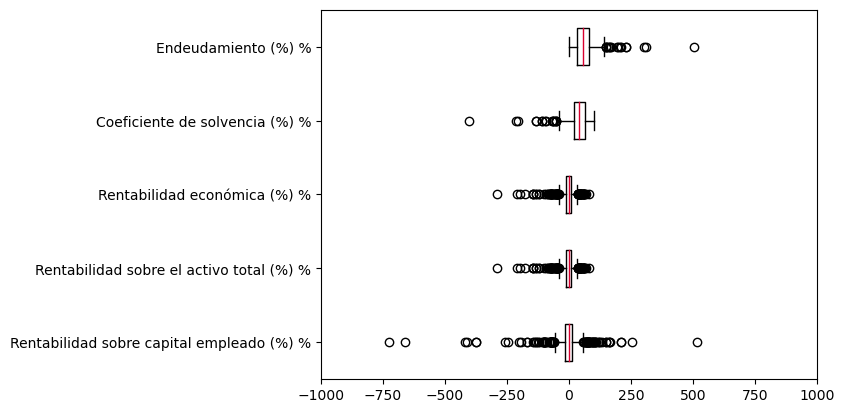

In [ ]:
ax1 = df_numeric2[columnas[:5]].plot(kind='box', color = 'black', vert= 0, flierprops=dict(color='black', markeredgecolor='black'),
            medianprops=dict(color='#d9002f'))

plt.xlim(-1000,1000)

plt.title('')
plt.show()


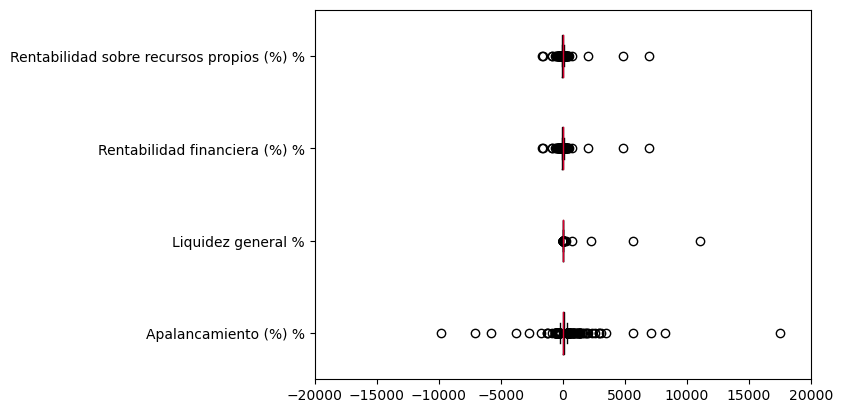

In [ ]:
ax2 = df_numeric2[columnas[5:9]].plot(kind='box', vert = 0, color = 'black', flierprops=dict(color='black', markeredgecolor='black'),
            medianprops=dict(color='#d9002f'))
plt.title('')
plt.xlim(-20000,20000)
plt.show()

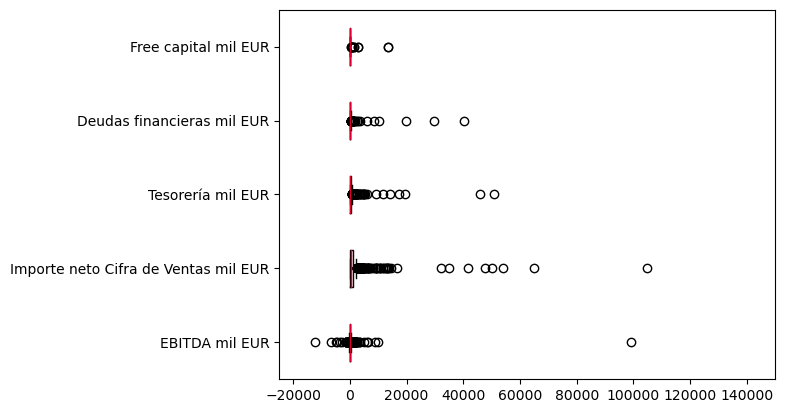

In [ ]:
ax3 = df_numeric2[columnas[10:15]].plot(kind='box', color = 'black', vert= 0, flierprops=dict(color='black', markeredgecolor='black'),
            medianprops=dict(color='#d9002f'))
plt.xlim(-25000,150000)

plt.show()

Text(42.597222222222214, 0.5, '')

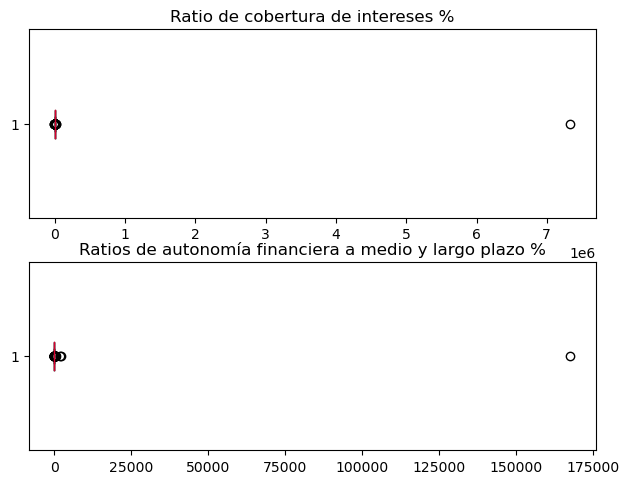

In [ ]:
fig, ax4 = plt.subplots(2,1)
plt.tight_layout()
ax4[0].boxplot(df_numeric2[columnas[15]][~np.isnan(df_numeric2[columnas[15]])],
            flierprops=dict(color='black', markeredgecolor='black'),
            medianprops=dict(color='#d9002f'), vert=0)
ax4[0].set_title('Ratio de cobertura de intereses %')
ax4[0].set_xlabel('')

ax4[1].boxplot(df_numeric2[columnas[16]][~np.isnan(df_numeric2[columnas[16]])],
            flierprops=dict(color='black', markeredgecolor='black'),
            medianprops=dict(color='#d9002f'), vert =0)
ax4[1].set_title('Ratios de autonomía financiera a medio y largo plazo %')
ax4[1].set_ylabel('')

Text(0.5, 23.52222222222222, '')

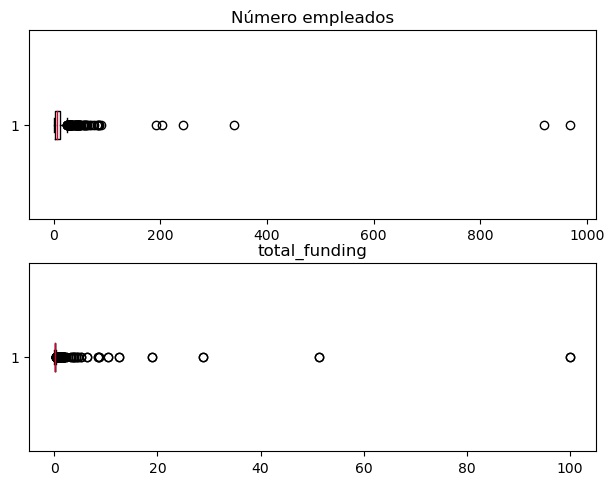

In [ ]:
fig, ax5 = plt.subplots(2,1)
plt.tight_layout()

ax5[0].boxplot(df_numeric2[columnas[17]][~np.isnan(df_numeric2[columnas[17]])],
            flierprops=dict(color='black', markeredgecolor='black'),
            medianprops=dict(color='#d9002f'), vert =0)
ax5[0].set_title('Número empleados')
ax5[0].set_xlabel('')

ax5[1].boxplot(df_numeric2[columnas[18]][~np.isnan(df_numeric2[columnas[18]])],
            flierprops=dict(color='black', markeredgecolor='black'),
            medianprops=dict(color='#d9002f'), vert=0)
ax5[1].set_title('total_funding')
ax5[1].set_xlabel('')

Una vez hecho esto, se ha procedido a identificar las empresas consideradas outliers en cada variable:

In [ ]:
def saber_empresa_outliersMAX(df:pd.DataFrame, columnas:list):
    """Función que devuelve las 6 primeras instancias de un dataframe ordenado de mayor a menor según las diferentes columnas 
    introducidas junto con la variable 'Nombre_sabi' y 'año'. 

    Args:
        df (DataFrame): dataframe que incluya todas las variables
        columnas (list): lista de columnas
    """
    for var in columnas:
        print(df.sort_values(by = var, ascending =  False)[['Nombre_sabi',var,'year']][:6])

In [ ]:
def saber_empresa_outliersMIN(df:pd.DataFrame, columnas:list):
    """Función que devuelve las 6 primeras instancias de un dataframe ordenado de menor a mayor según las diferentes columnas 
    introducidas junto con la variable 'Nombre_sabi' y 'año'. 

    Args:
        df (DataFrame): dataframe que incluya todas las variables
        columnas (list): lista de columnas
    """
    for var in columnas:
        print(df.sort_values(by = var, ascending =  True)[['Nombre_sabi',var,'year']][:6])

In [ ]:
saber_empresa_outliersMAX(df_tot2, columnas)

                                           Nombre_sabi  \
117              GLOBETESTING NORTE SOCIEDAD LIMITADA.   
770                        TITHONUS BIORESOURCES, S.L.   
423    ENERGIA DISTRIBUIDA DEL NORTE SOCIEDAD ANONIMA.   
514                                    TIDORE FOOD SL.   
515                                    TIDORE FOOD SL.   
403  MOTION AND CONTROL APLICACIONES SOCIEDAD LIMIT...   

     Rentabilidad sobre capital empleado (%) %  year  
117                                    515.686  2020  
770                                    254.817  2020  
423                                    210.267  2020  
514                                    209.900  2021  
515                                    166.808  2020  
403                                    161.840  2020  
                                           Nombre_sabi  \
597                    INDARWEB XXI SOCIEDAD LIMITADA.   
611  INGENIERIA DE SIMULACIONES DEL NORTE SOCIEDAD ...   
209                     HODEIA APP

In [ ]:
saber_empresa_outliersMIN(df_tot2, columnas)

                                         Nombre_sabi  \
513  HIPATIA CONTROL INTELIGENTE, SOCIEDAD LIMITADA.   
807                             SAFYBOX DELIBERTY SL   
422  ENERGIA DISTRIBUIDA DEL NORTE SOCIEDAD ANONIMA.   
587            FUTBOLTEK TECHNOLOGY FOR TRAINING SL.   
806                             SAFYBOX DELIBERTY SL   
406            BERBA TRANSLATIONS SOCIEDAD LIMITADA.   

     Rentabilidad sobre capital empleado (%) %  year  
513                                   -724.311  2020  
807                                   -659.283  2020  
422                                   -418.812  2021  
587                                   -412.170  2020  
806                                   -374.825  2021  
406                                   -374.248  2021  
                                         Nombre_sabi  \
807                             SAFYBOX DELIBERTY SL   
720                    VIRTUALREC SOCIEDAD LIMITADA.   
806                             SAFYBOX DELIBERTY SL  